### Part 2-  Improved Model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv('cleaned_Manhattan12_improvedModel.csv')
df.head(5)

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_PRESENT,ADDRESS,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALES
0,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,2214693.0
1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1654656.0
2,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1069162.0
3,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1374637.0
4,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,345 WEST 14TH STREET,10014,0,0,0,0,0,0,2,R4,1649565.0


In [8]:
df.describe()

,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALES
count,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,18844.000000,1.884400e+04
mean,1120.647156,675.061346,10029.742464,1.391477,0.203142,1.673530,1619.422628,2.271864,1.760848e+06
std,495.077704,831.588825,36.371818,8.291808,1.396738,8.541371,732.728437,0.720664,3.756454e+06
min,11.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00
25%,849.000000,29.000000,10014.000000,0.000000,0.000000,0.000000,1908.000000,2.000000,4.127325e+05
50%,1137.000000,111.000000,10021.000000,0.000000,0.000000,1.000000,1930.000000,2.000000,7.750000e+05
75%,1444.000000,1188.000000,10028.000000,1.000000,0.000000,1.000000,1965.000000,2.000000,1.675021e+06
max,2250.000000,9103.000000,10463.000000,538.000000,68.000000,550.000000,2013.000000,4.000000,6.000000e+07


In [12]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'BLOCK', 'LOT', 'BUILDING_CLASS_PRESENT', 'ADDRESS', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALES'],
      dtype='object')

In [9]:
# import model 
from sklearn.linear_model import LinearRegression

In [10]:
mdl = LinearRegression()

In [26]:
#  Set dependent and independent variables

X = df[['RESIDENTIAL_UNITS','COMMERCIAL_UNITS', 'TOTAL_UNITS', 'TAX_CLASS_AT_TIME_OF_SALE']]
y = df['SALES']

In [20]:
print(X)

      BUILDING_CLASS_PRESENT  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  \
0                                             0                 0   
1                                             0                 0   
2                                             0                 0   
3                                             0                 0   
4                                             0                 0   
...                      ...                ...               ...   
18839                     G7                  0                 0   
18840                     G1                  0                 2   
18841                     V1                  0                 0   
18842                     V1                  0                 0   
18843                     V1                  0                 0   

       TOTAL_UNITS  TAX_CLASS_AT_TIME_OF_SALE  
0                0                          2  
1                0                          2  
2                0         

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [28]:
lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression()

In [29]:
print(lm.intercept_)

1515132.6808631076


In [31]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) 

In [32]:
coeff_df

,Coefficient
RESIDENTIAL_UNITS,1.245709e+06
COMMERCIAL_UNITS,1.849775e+06
TOTAL_UNITS,-1.149321e+06
TAX_CLASS_AT_TIME_OF_SALE,1.821158e+04


### Predictions from our Linear Regression Model

In [33]:
predictions = lm.predict(X_test)  

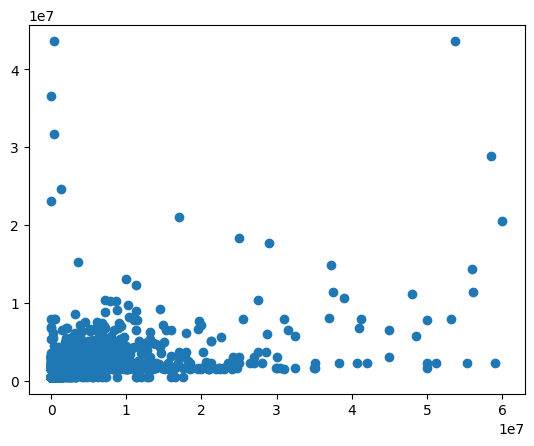

In [34]:
plt.scatter(y_test,predictions)

C:\Users\DDC\AppData\Local\Temp\ipykernel_25640\1501378968.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


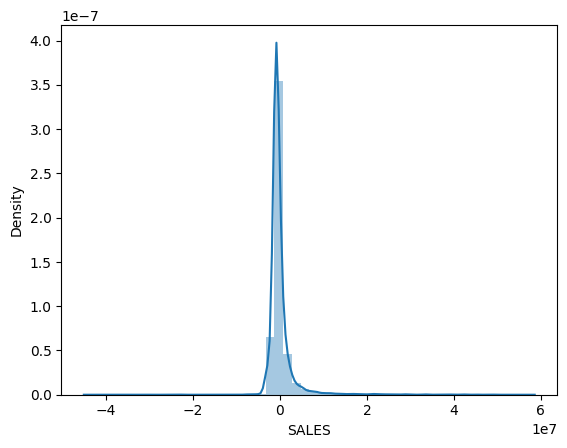

In [36]:
# Import seaborn
import seaborn as sns
sns.distplot((y_test-predictions),bins=50); 

### Regression Evaluation Metrics

In [37]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 1546509.1032803713
MSE: 13429636919375.562
RMSE: 3664646.9024144146


### 2. use k mean cluster and compare the obtained clusters with the distribution found in the data justify your clustering and visualizer your cluster as appropriated 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant features

features = ['RESIDENTIAL_UNITS','COMMERCIAL_UNITS', 'TOTAL_UNITS', 'TAX_CLASS_AT_TIME_OF_SALE']


In [43]:
# Standardize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


In [45]:
# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

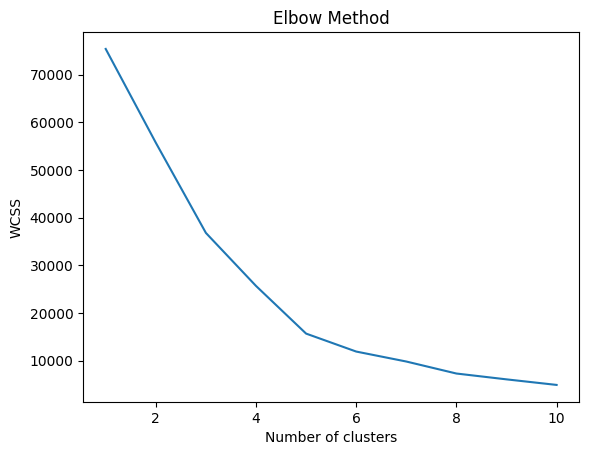

In [46]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df[features])

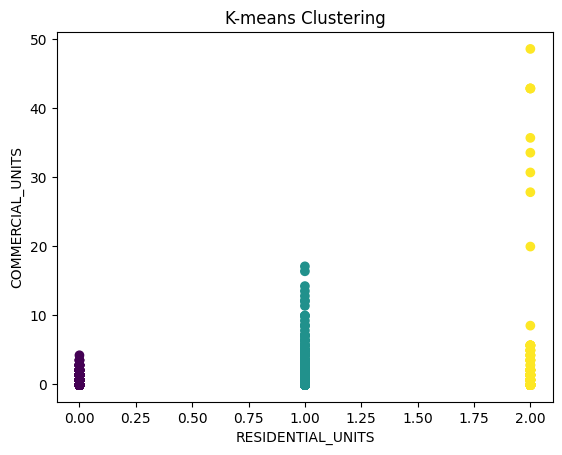

In [70]:
# Plot the results
df['Cluster'] = clusters
plt.scatter(df['RESIDENTIAL_UNITS'], df['COMMERCIAL_UNITS'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('RESIDENTIAL_UNITS')
plt.ylabel('COMMERCIAL_UNITS')
plt.show()

In [71]:
# Compare the distribution of the clusters with the distribution in the data
cluster_counts = df['TAX_CLASS_AT_TIME_OF_SALE'].value_counts(normalize=True)
feature_means = df.groupby('Cluster')[features].mean()

In [72]:
print('TAX_CLASS_AT_TIME_OF_SALE Counts:')
print(cluster_counts)

print('\nFeature Means:')
print(feature_means)

TAX_CLASS_AT_TIME_OF_SALE Counts:
0    0.846689
1    0.143653
2    0.009658
Name: TAX_CLASS_AT_TIME_OF_SALE, dtype: float64

Feature Means:
         RESIDENTIAL_UNITS  COMMERCIAL_UNITS  TOTAL_UNITS  \
Cluster                                                     
0                      0.0         -0.120539    -0.079481   
1                      1.0          0.529004    -0.010175   
2                      2.0          2.698778     7.119010   

         TAX_CLASS_AT_TIME_OF_SALE  
Cluster                             
0                              0.0  
1                              1.0  
2                              2.0  


Now that we have performed K-means clustering on the house prices data and obtained cluster assignments for each data point, we can build local regression models for each cluster to predict house prices based on the relevant features.

Here's an example of how we can do this using scikit-learn's KernelRidge class: